In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

import opensea.opensea_events as Events
import opensea.database as Database

In [3]:
#read from mongoDB
ag_sales = Database.read_mongo('ape-gang_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
ag_old_sales = Database.read_mongo('ape-gang-old_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
apes=Database.read_mongo('ape-gang-old_traits',return_df=True)

sales = ag_sales.append(ag_old_sales)

In [4]:
day_n = 30
recent_sales = sales[sales.time > dt.datetime.now()-dt.timedelta(days=day_n)]
recent_sales = recent_sales[['asset_id','sale_price','time']].merge(apes, on='asset_id',how='left').sort_values('sale_price',ascending=False)

In [5]:
#sort by time
recent_sales = recent_sales.sort_values('time',ascending=False)

<AxesSubplot:>

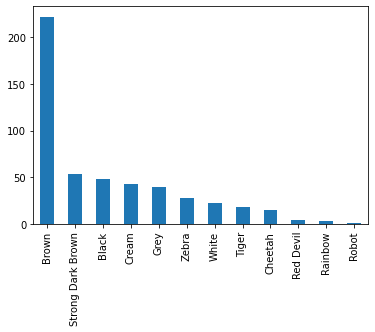

In [7]:
recent_sales.Fur.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='rarity_rank', ylabel='sale_price'>

<Figure size 1440x720 with 0 Axes>

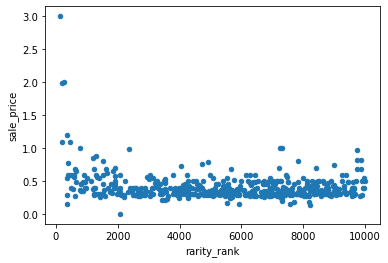

In [10]:
#plot rarity_rank and sale_price
recent_sales.plot(x='rarity_rank',y='sale_price',kind='scatter')